## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## Problema 1

Considere las dos caracteristicas "Alcohol level" y "Alcalinity level" del conjunto de datos [wine_data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). 

In [3]:
# load data
from sklearn.datasets import load_wine
import scipy.stats

alcohol_levels = load_wine()['data'][:, [0]].ravel()
alcalinity_levels = load_wine()['data'][:, [3]].ravel()

alcohol_levels.shape, alcalinity_levels.shape

((178,), (178,))

a) A partir de esas dos caracteristicas del vino, calcule el vector $\vec{\mu}$ y la matrix de covarianza $\Sigma$, 

$$
\vec{\mu} = \begin{bmatrix}
\mu_x\\
\mu_y
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y)\\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

In [4]:
covar = np.zeros((2, 2))
mu = np.zeros(2)
## Tu codigo aqui
N = alcohol_levels.shape
mu[0] = alcohol_levels.sum()/N
mu[1] = alcalinity_levels.sum()/N

var_x = ((alcohol_levels - mu[0])**2).sum()/N
var_y = ((alcalinity_levels - mu[1])**2).sum()/N

covar_xy = ((alcohol_levels - mu[0])*(alcalinity_levels - mu[1])).sum()/N

covar[0,0] = var_x
covar[0,1] = covar_xy
covar[1,0] = covar_xy
covar[1,1] = var_y


print(mu,"\n")
print(covar)
N

[13.00061798 19.49494382] 

[[ 0.65535973 -0.83636766]
 [-0.83636766 11.09003061]]


(178,)

b) Gráfique los puntos del problema, con alcohol levels en x, y alcalinity levels en y

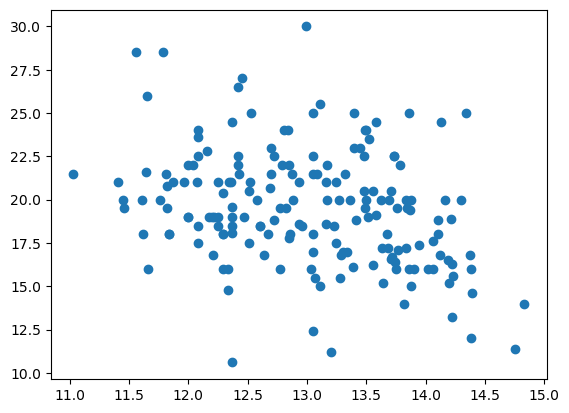

In [5]:
# tu codigo aqui
plt.scatter(alcohol_levels,alcalinity_levels)


c) A partir del la matriz de covarianza se puede obtener una función de de densidad de probabilidad de los datos como una Gaussiana bivariada, cuya fórmula está dada por, 

$$
  f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k\text{det}(\Sigma)}}\exp\Big(-\frac{1}{2}(\mathbf{x}- \mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\Big)
$$

Donde $\mathbf{\mu}$, es el promedio, $\Sigma$ la matriz de covarianza, y $k$, el orden de la gausiana multivariada.

Use la siguiente implementación para gráficar la función de densidad de probabilidad bivariada. [Bivariate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html)

Tenga en cuenta los límites



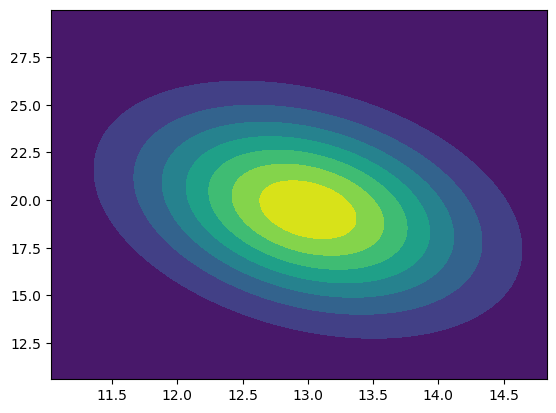

In [24]:
# tu codigo aqui
x, y = np.mgrid[min(alcohol_levels):max(alcohol_levels):.01, min(alcalinity_levels):max(alcalinity_levels):.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean = mu, cov = covar)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))


d) A partir de la función de densidad, La correlación de los datos es positiva, negativa o nula? Por qué?

La covarianza entre los datos parece ser negativa, eso debido a la inclinación de los datos, lo cual muestra que a medida de alcohol aumenta, su alcalinidad decrece.

## Problema 2 (continuación)

e) Diagonalice la matriz de covarianza, es decir imprima los valores propios y vectores propios de la matriz de covarianza

In [31]:
eigen_values,eigen_vectors = np.linalg.eig(covar)
print(eigen_values)
print(eigen_vectors)

[ 0.58874779 11.15664256]
[[-0.9968434   0.07939293]
 [-0.07939293 -0.9968434 ]]


f) A partir de los vectores propios y valores propios de la matriz, y el vector $\vec{\mu}$.

*   Desplace los datos de forma que el promedio de los datos en juntas coordenadas sea cero.
*   Rote los datos de forma que la covarianza de los datos sea cero, para ello use la matriz de vectores propios.

Una rotación de puntos en dos dimensiones se puede ver como una matriz unitaria de la forma,

$$
\text{Rot}(\theta) = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

In [91]:
# tu codigo aqui

new_covar = np.zeros((2,2))
new_alcohol_levels = alcohol_levels - mu[0]
new_alcalinity_levels = alcalinity_levels - mu[1]

new_var_x = ((new_alcohol_levels)**2).sum()/N
new_var_y = ((new_alcalinity_levels)**2).sum()/N

new_covar_xy = ((new_alcohol_levels)*(new_alcalinity_levels)).sum()/N

new_covar[0,0] = new_var_x
new_covar[0,1] = new_covar_xy
new_covar[1,0] = new_covar_xy
new_covar[1,1] = new_var_y

vectores = np.zeros((178,2))
for i in range(N[0]):
    vectores[i] = np.array([new_alcohol_levels[i],new_alcalinity_levels[i]])
    
for i in range(N[0]):
    vectores[i] = eigen_vectors@vectores[i]

    
x_ = vectores[:,0]
y_ = vectores[:,1]

g) Gráfique la función de densidad de probabilidad de datos rotados  a partir de la diagonzalización de la matrix de covarianza original (parte f). 

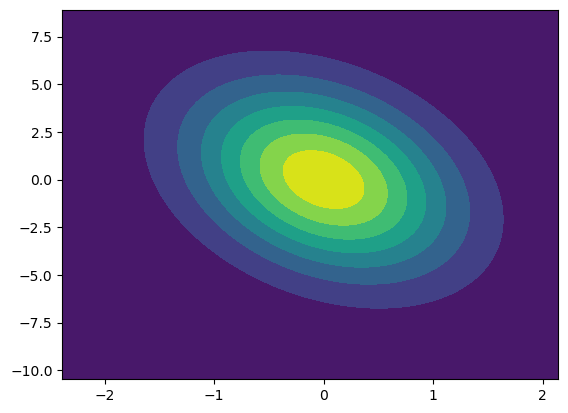

In [94]:
# tu codigo aqui
x, y = np.mgrid[min(x_):max(x_):.01, min(y_):max(y_):.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean = np.array([0.,0.]), cov = new_covar)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

h) Las coordenadas de los nuevos datos se llaman Componentes principales, lo que hicimos fue basicamente el método PCA. Argumente cómo se puede usar PCA para reducir la dimensionalidad de los datos.

En conjuntos de datos con muchas características, puede haber redundancia o correlación entre algunas de ellas. PCA permite identificar y eliminar características redundantes al encontrar combinaciones lineales de características que capturan la mayor parte de la varianza en los datos. Al eliminar características redundantes, se simplifica la representación de los datos sin perder información significativa. Además, al reducir la dimensionalidad de los datos, PCA puede ayudar a eliminar el ruido y las variaciones irrelevantes o de baja importancia. Al eliminar estas variaciones insignificantes, se puede obtener una representación más compacta y eficiente de los datos, lo que puede llevar a un mejor rendimiento en tareas de modelado o análisis.